In [1]:

import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline

In [2]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


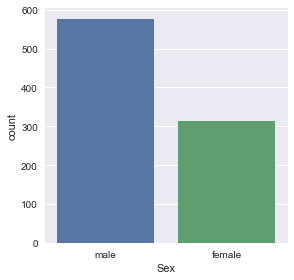

In [3]:
sb.factorplot('Sex',kind='count',data=titanic_df)

x축에는 1, 2, 3으로 승객 등급을 나열하고 y축에 그 수를 표시했다. hue는 counting할 대상

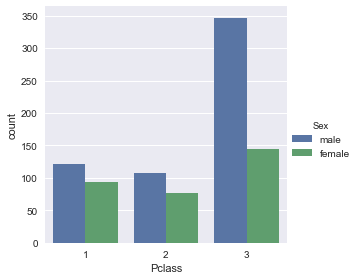

In [4]:
sb.factorplot('Pclass', kind='count', hue='Sex', order=[1,2,3], data=titanic_df)

남성과 여성이라는 단순 성별뿐만 아니라 어린이도 고려 sns.factorplot('Pclass', kind='count', hue='person', order=[1,2,3], data=titanic_df)
[출처] dbguide.net/파이썬으로 도전하는 데이터분석(2)|작성자 장군




In [5]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [6]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


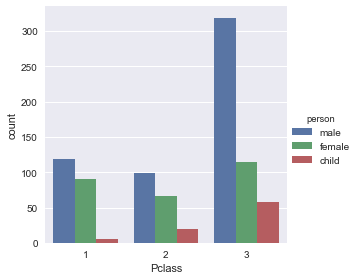

In [8]:
sb.factorplot('Pclass', kind='count', hue='person', order=[1,2,3], data=titanic_df)

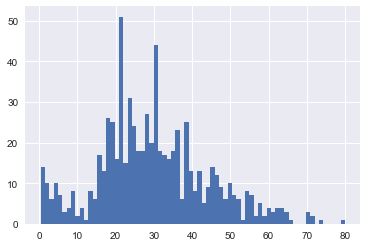

In [9]:
titanic_df['Age'].hist(bins=70)

In [10]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

승객들은 어떤 Deck에 있었으며 그들의 Class와는 어떤 관계에 있는지 고려 

In [11]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

첫번째 글자만 가져와서 객체에 담고 리스트 객체 levels에 앞 글자 하나만 가져와서 담은 후에 이를 아래와 같이 DataFrame으로 만들어보자

In [12]:
levels=[]
for level in deck:
    levels.append(level[0])

In [13]:
cabin_df = pd.DataFrame(levels)
cabin_df.columns=['Cabin']

In [14]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


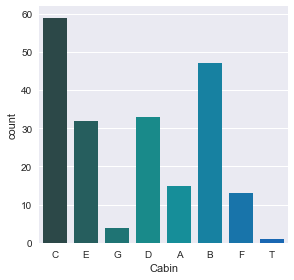

In [15]:
sb.factorplot('Cabin',kind='count',data=cabin_df,palette='winter_d')

T라는 Deck는 없는데 그래프에는 T라는 데이터가 있다는 것이다. T라는 Deck만 빼고 다시 가져와야 한다

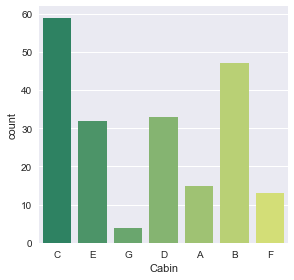

In [16]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sb.factorplot('Cabin', kind='count', data=cabin_df, palette='summer')

map함수 : 특정정보를 특정값으로 매핑 

In [17]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

In [18]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,no


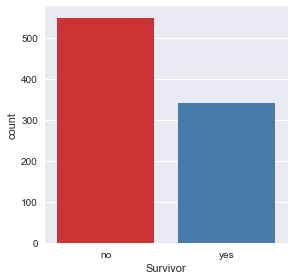

In [19]:
sb.factorplot('Survivor', kind='count', data=titanic_df, palette='Set1')

In [20]:
titanic_df['Survivor'].value_counts()

no     549
yes    342
Name: Survivor, dtype: int64

3등급이 생존률현저히 낮아짐 

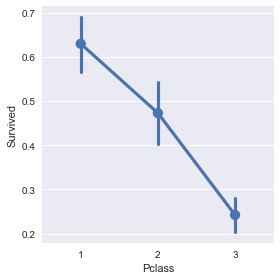

In [21]:
sb.factorplot('Pclass','Survived',data=titanic_df, order=[1,2,3])

2, 3등급의 남성 승객의 생존율에는 큰 차이가 없음을 알 수 있다. 어린이 승객의 생존율 또한 1등급보다 2등급이 오히려 더 높다. 그러나 여성과 어린이의 경우 3등급 승객의 생존율은 확연하게 낮다

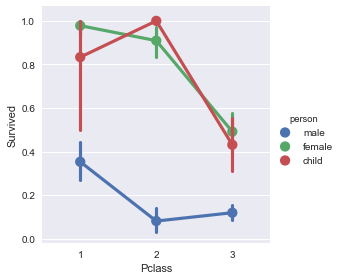

In [22]:
sb.factorplot('Pclass','Survived',hue='person',data=titanic_df, order=[1,2,3])

#나이와의 상관관계?

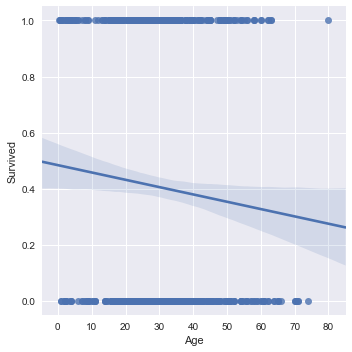

In [23]:
sb.lmplot('Age', 'Survived', data=titanic_df)

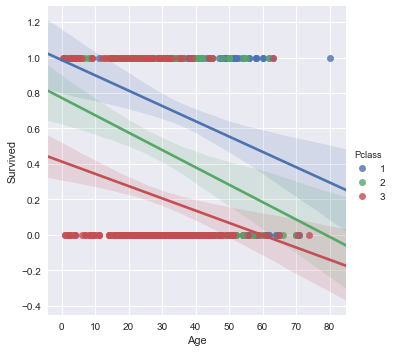

In [24]:
sb.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df)

#나이와 성별관계 

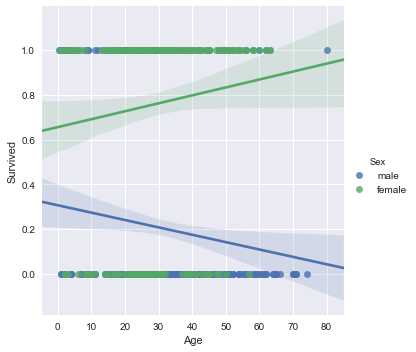

In [25]:
sb.lmplot('Age', 'Survived', hue='Sex', data=titanic_df)

#위 결과를 보면 남성은 나이가 많을수록 생존율이 떨어지는데 비해 여성은 반대로 나타났다. 여성은 나이가 많아질수록 생존율이 높다는 것을 알 수 있게 됐다.

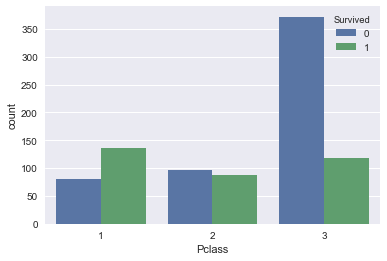

In [26]:
sb.countplot(data=titanic_df, x='Pclass', hue="Survived")

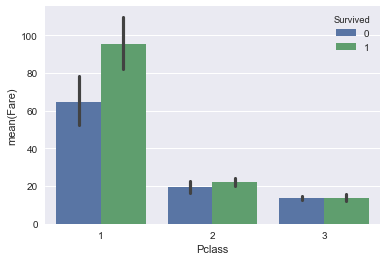

In [27]:
sb.barplot(data=titanic_df, x='Pclass',y='Fare',hue='Survived')
#검정색까만색이 길수록 표준편차가 큼 

pointplot

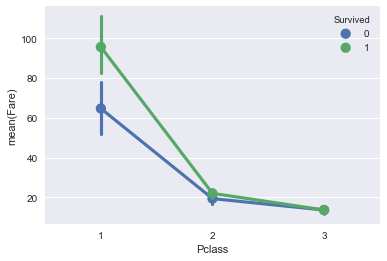

In [31]:
sb.pointplot(data=titanic_df,x='Pclass',y='Fare',hue='Survived')

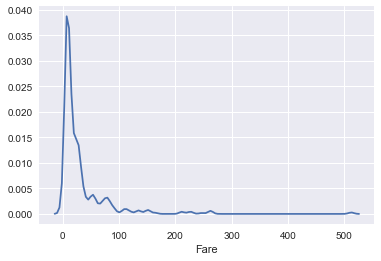

In [38]:
sb.distplot(titanic_df['Fare'],hist=False)

In [39]:
low_fare=titanic_df[titanic_df["Fare"]<100]

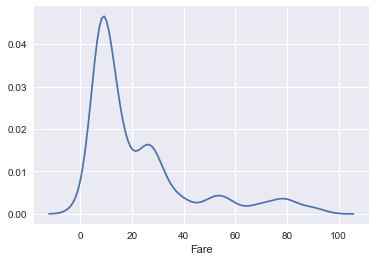

In [40]:
sb.distplot(low_fare["Fare"],hist=False)

In [52]:
perish =low_fare[low_fare['Survived']==0]

In [53]:
survived=low_fare[low_fare['Survived']==1]

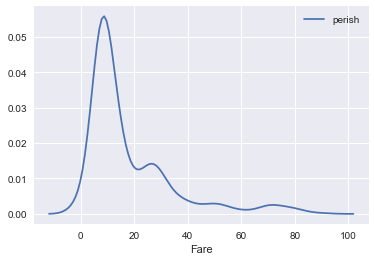

In [56]:
sb.distplot(perish["Fare"],hist=False,label="perish")

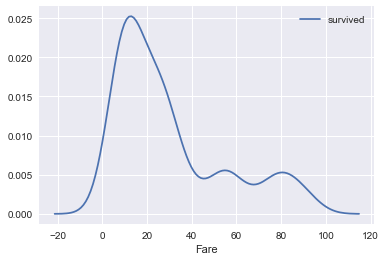

In [57]:
sb.distplot(survived["Fare"],hist=False,label="survived")

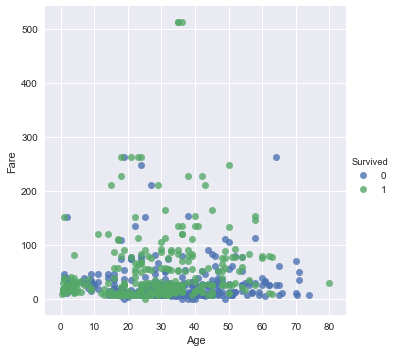

In [61]:
#생존자와 사망자의 운임요금 분포 ,fit_reg: regression 선지우기 
sb.lmplot(data=titanic_df,x="Age",y="Fare",fit_reg=False, hue="Survived")

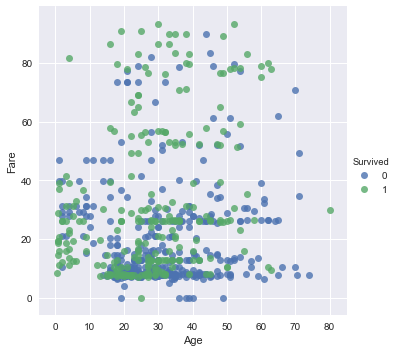

In [62]:
sb.lmplot(data=low_fare, x="Age",y="Fare",fit_reg=False, hue="Survived")